In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [28]:
data=pd.read_csv('/Users/spillai/Downloads/vdc.csv')
print(data.shape)


(10202, 48)


In [29]:
print(list(data.columns))

['dtchannelname', 'renew_ind', 'not_null_actions', 'null_actions', 'mailbox_created', 'billingcentral', 'renewal', 'email', 'marketing', 'domains', 'fm', 'ftp', 'mysql', 'weebly', 'support', 'not_null_actions_9', 'null_actions_9', 'mailbox_created_9', 'billingcentral_9', 'renewal_9', 'email_9', 'marketing_9', 'domains_9', 'website_9', 'fm_9', 'ftp_9', 'mysql_9', 'weebly_9', 'support_9', 'not_null_actions_10', 'null_actions_10', 'mailbox_created_10', 'billingcentral_10', 'renewal_10', 'email_10', 'marketing_10', 'domains_10', 'website_10', 'fm_10', 'ftp_10', 'mysql_10', 'weebly_10', 'support_10', 'add_on_mrr', 'domain_mrr', '1_year_domains_new', 'com_domains_new', 'org_domains_new']


In [30]:
data['com_domains_new'].unique()

array([ 0,  1,  2,  4,  3,  7, 26,  6,  5])

In [31]:
data['renew_ind'].value_counts()

0    5464
1    4738
Name: renew_ind, dtype: int64

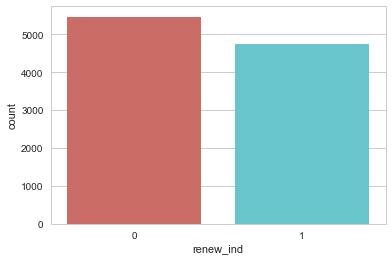

In [32]:
sns.countplot(x='renew_ind',data=data,palette='hls')
plt.show()
plt.savefig('count_plot')

In [12]:
data.groupby('renew_ind').mean()

,dtcommid,not_null_actions,null_actions,mailbox_created,billingcentral,renewal,email,marketing,domains,fm,...,fm_10,ftp_10,mysql_10,weebly_10,support_10,add_on_mrr,domain_mrr,1_year_domains_new,com_domains_new,org_domains_new
renew_ind,,,,,,,,,,,,,,,,,,,,,
0,8.712660e+06,119.085469,150.567716,1.053075,0.406296,0.669656,6.877379,0.359078,4.648243,8.733895,...,0.717240,0.137628,0.332357,0.052160,0.155564,1.574122,0.097529,0.107064,0.056918,0.006955
1,8.730481e+06,121.925074,155.299493,1.468552,0.334318,0.381596,8.483326,0.337906,5.016674,7.917476,...,0.811524,0.220346,0.371887,0.185732,0.209371,1.721528,0.159244,0.147742,0.072604,0.010764


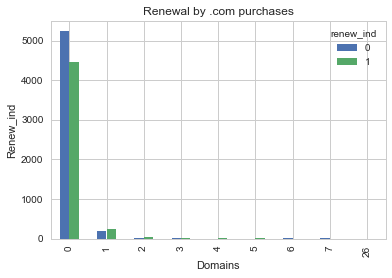

In [13]:
%matplotlib inline
pd.crosstab(data.com_domains_new,data.renew_ind).plot(kind='bar')
plt.title('Renewal by .com purchases')
plt.xlabel('Domains')
plt.ylabel('Renew_ind')
plt.savefig('g1')

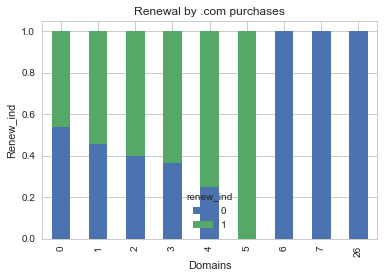

In [16]:
table=pd.crosstab(data.com_domains_new,data.renew_ind)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Renewal by .com purchases')
plt.xlabel('Domains')
plt.ylabel('Renew_ind')
plt.savefig('g2')

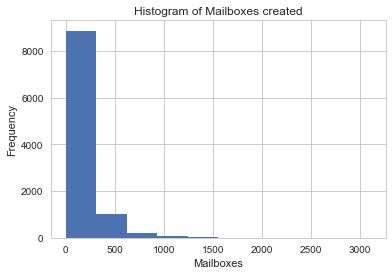

In [18]:
# May need to change to scale for the histogram here 
data.null_actions.hist()
plt.title('Histogram of Mailboxes created')
plt.xlabel('Mailboxes')
plt.ylabel('Frequency')
plt.savefig('hist_mc')

In [33]:
data.columns.values

array(['dtchannelname', 'renew_ind', 'not_null_actions', 'null_actions',
       'mailbox_created', 'billingcentral', 'renewal', 'email',
       'marketing', 'domains', 'fm', 'ftp', 'mysql', 'weebly', 'support',
       'not_null_actions_9', 'null_actions_9', 'mailbox_created_9',
       'billingcentral_9', 'renewal_9', 'email_9', 'marketing_9',
       'domains_9', 'website_9', 'fm_9', 'ftp_9', 'mysql_9', 'weebly_9',
       'support_9', 'not_null_actions_10', 'null_actions_10',
       'mailbox_created_10', 'billingcentral_10', 'renewal_10', 'email_10',
       'marketing_10', 'domains_10', 'website_10', 'fm_10', 'ftp_10',
       'mysql_10', 'weebly_10', 'support_10', 'add_on_mrr', 'domain_mrr',
       '1_year_domains_new', 'com_domains_new', 'org_domains_new'], dtype=object)

In [34]:
cat_vars=['dtchannelname']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
    
cat_vars=['dtchannelname']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [35]:
data_final=data[to_keep]
data_final.columns.values

array(['renew_ind', 'not_null_actions', 'null_actions', 'mailbox_created',
       'billingcentral', 'renewal', 'email', 'marketing', 'domains', 'fm',
       'ftp', 'mysql', 'weebly', 'support', 'not_null_actions_9',
       'null_actions_9', 'mailbox_created_9', 'billingcentral_9',
       'renewal_9', 'email_9', 'marketing_9', 'domains_9', 'website_9',
       'fm_9', 'ftp_9', 'mysql_9', 'weebly_9', 'support_9',
       'not_null_actions_10', 'null_actions_10', 'mailbox_created_10',
       'billingcentral_10', 'renewal_10', 'email_10', 'marketing_10',
       'domains_10', 'website_10', 'fm_10', 'ftp_10', 'mysql_10',
       'weebly_10', 'support_10', 'add_on_mrr', 'domain_mrr',
       '1_year_domains_new', 'com_domains_new', 'org_domains_new',
       'dtchannelname_Affiliate', 'dtchannelname_Direct',
       'dtchannelname_Reseller'], dtype=object)

In [36]:
data_final_vars=data_final.columns.values.tolist()
y=['renew_ind']
X=[i for i in data_final_vars if i not in y]

In [37]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 18)
rfe = rfe.fit(data[X], data[y] )
print(rfe.support_)
print(rfe.ranking_)

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False False False  True False False False False False False False
 False False False  True False  True  True  True  True False False False
 False False  True False False  True False  True  True  True False  True
 False False False False False False  True False  True  True  True  True
  True]
[26 25  2 15  1 31  9 16 23 30 13 24 19 27 18  1  4  1  1  1  1 21 17  5  6
 32  1 20 22  1  8  1  1  1  3  1 11  7 10 29 12 14  1 28  1  1  1  1  1]


In [39]:
cols=["renewal", "mailbox_created_9", "email_9", "marketing_9", "domains_9", "support_9", "mailbox_created_10", 
      "renewal_10", "email_10", "marketing_10", "website_10", "domain_mrr", "com_domains_new", "org_domains_new", 
      "dtchannelname_Affiliate", "dtchannelname_Direct","dtchannelname_Reseller"]
X=data_final[cols]
y=data_final['renew_ind']

In [40]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


         Current function value: 0.677159
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:              renew_ind   No. Observations:                10202
Model:                          Logit   Df Residuals:                    10185
Method:                           MLE   Df Model:                           16
Date:                Fri, 12 Jan 2018   Pseudo R-squ.:                 0.01948
Time:                        13:22:15   Log-Likelihood:                -6908.4
converged:                      False   LL-Null:                       -7045.6
                                        LLR p-value:                 4.687e-49
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
renewal                    -0.0927      0.012     -7.421      0.000      -0.117      -0.068
mailbox_created_9         

/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.55


In [44]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.556


In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1034  566]
 [ 819  642]]


In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.56      0.65      0.60      1600
          1       0.53      0.44      0.48      1461

avg / total       0.55      0.55      0.54      3061



In [ ]:
#Interpretation: Of the entire test set, 55% of the promoted term deposit were 
#the term deposit that the customers liked. 
#Of the entire test set, 90% of the customer’s preferred term deposits that were promoted.

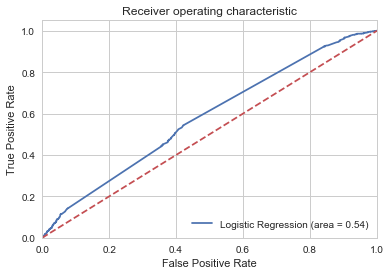

In [47]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()